In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import math as ma
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [2]:
df=pd.read_csv('../input/iris/Iris.csv')

## Here, I have to predicted the species of a flower by training our model on the Iris Dataset with the given input points using Naive Bayes.

## Input Points

## {SL=4.7, SW=3.7,PL=2,PW=0.3}

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## P(Species/SL=4.7, SW=3.7,PL=2,PW=0.3)=P(SL=4.7/Species)P(SW=3.7/Species)P(PL=2/Species)P(PW=0.3/Species)P(Species)

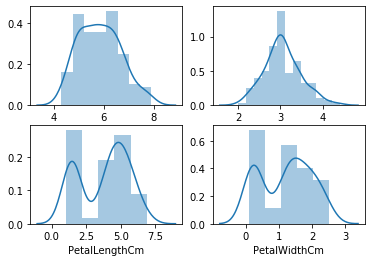

In [6]:
plt.subplot(221)
sns.distplot(df['SepalLengthCm'])
plt.subplot(222)
sns.distplot(df['SepalWidthCm'])
plt.subplot(223)
sns.distplot(df['PetalLengthCm'])

plt.subplot(224)
sns.distplot(df['PetalWidthCm'])
plt.show()

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [8]:
P=50/100

## SD Determination

In [9]:
df[df['Species']=='Iris-setosa'].std() 


Id               14.577380
SepalLengthCm     0.352490
SepalWidthCm      0.381024
PetalLengthCm     0.173511
PetalWidthCm      0.107210
dtype: float64

In [10]:
df[df['Species']=='Iris-versicolor'].std() 


Id               14.577380
SepalLengthCm     0.516171
SepalWidthCm      0.313798
PetalLengthCm     0.469911
PetalWidthCm      0.197753
dtype: float64

In [11]:
df[df['Species']=='Iris-virginica'].std() 

Id               14.577380
SepalLengthCm     0.635880
SepalWidthCm      0.322497
PetalLengthCm     0.551895
PetalWidthCm      0.274650
dtype: float64

## Mean Determination

In [12]:
df[df['Species']=='Iris-setosa'].mean() 

Id               25.500
SepalLengthCm     5.006
SepalWidthCm      3.418
PetalLengthCm     1.464
PetalWidthCm      0.244
dtype: float64

In [13]:
df[df['Species']=='Iris-versicolor'].mean() 


Id               75.500
SepalLengthCm     5.936
SepalWidthCm      2.770
PetalLengthCm     4.260
PetalWidthCm      1.326
dtype: float64

In [14]:
df[df['Species']=='Iris-virginica'].mean() 

Id               125.500
SepalLengthCm      6.588
SepalWidthCm       2.974
PetalLengthCm      5.552
PetalWidthCm       2.026
dtype: float64

In [15]:
def cal(x,m,s):
    num = ma.exp(-0.5*np.square((x-m)/s))
    den = s*ma.sqrt(2*ma.pi)
                              
    return(num/den)

In [16]:
## Iris-setosa
                   #std(s)   #mean(m)
#SepalLengthCm     0.352490   5.006
#SepalWidthCm      0.381024   3.418
#PetalLengthCm     0.173511   1.464
#PetalWidthCm      0.107210   0.244

In [17]:
P_Setosa=cal(4.7,5.006,0.352490)*cal(3.7,3.418,0.381024)*cal(2,1.464,1.173511)*cal(0.3,0.244,0.107210)*P
P_Setosa

0.30736231345014386

In [18]:
## Iris-versicolor
                   #std(s)   #mean(m)
#SepalLengthCm     0.516171   5.936     
#SepalWidthCm      0.313798   2.770
#PetalLengthCm     0.469911   4.260
#PetalWidthCm      0.197753   1.326

In [19]:
P_Versicolor=cal(4.7,5.936,0.516171)*cal(3.7,2.770,0.313798)*cal(2,4.260,0.469911)*cal(0.3,1.326, 0.197753)*P
P_Versicolor

8.028710948822753e-15

In [20]:
## Iris-virginica
                  #std(s)    #mean(m)
#SepalLengthCm     0.635880   6.588
#SepalWidthCm      0.322497   2.974
#PetalLengthCm     0.551895   5.552
#PetalWidthCm      0.274650   2.026

In [21]:
P_Virginica=cal(4.7,6.588,0.635880)*cal(3.7,2.974,0.322497)*cal(2,5.552,0.551895)*cal(0.3,2.026,0.274650)*P
P_Virginica

1.058678228040372e-21

In [22]:
P_Setosa>P_Virginica

True

In [23]:
P_Setosa>P_Versicolor

True

## So, according to Naive Bayes the flower is Setosa

## Let's see the model's prediction

In [24]:
probability,species = [P_Setosa,P_Versicolor,P_Virginica],['Iris-setosa','Iris-versicolor','Iris-virginica']
print('Predicted species is : {}'.format(species[probability.index(max(probability))]))

Predicted species is : Iris-setosa
